# **1. Pytorch**

* Pytorch는 tensorflow와 함께 딥러닝에서 가장 널리 사용되는 framework
* 초기에는 Torch라는 이름으로 Lua언어 기반으로 만들어졌으나, 이후 python기반으로 변경한 것이 Pytorch임
* New York 대학교와 Facebook이 공동으로 만들었고, 가장 대중적으로 널리 사용되는 framework임

# **2. Pytorch import**

In [1]:
import torch
print(torch.__version__)

1.10.0+cu111


### **2-1. Tensor**

* 텐서(tensor)는 배열(array)이나 행렬(matrix)과 매우 유사한 특수한 자료구조
* Pytorch에서는 텐서를 사용하여 모델의 입력(input)과 출력(output), 그리고 모델의 매개변수들을 부호화(encode)함

In [2]:
# list로부터 직접 tensor 생성
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [3]:
import numpy as np

In [4]:
# numpy array로부터 tensor 생성
np_array = np.array(data)
x_np_1 = torch.tensor(np_array) # 카피를 만듬(새로운 텐서, 메모리낭비)
print(x_np_1)

tensor([[1, 2],
        [3, 4]])


In [5]:
x_np_2 = torch.as_tensor(np_array) # 뷰를 만듬
print(x_np_2)

tensor([[1, 2],
        [3, 4]])


In [6]:
x_np_3 = torch.from_numpy(np_array) # 뷰를 만듬
print(x_np_3)

tensor([[1, 2],
        [3, 4]])


In [7]:
x_np_1[0, 0] = 5
print(x_np_1)
print(np_array)

tensor([[5, 2],
        [3, 4]])
[[1 2]
 [3 4]]


In [8]:
x_np_2[0, 0] = 6
print(x_np_2)
print(np_array)

tensor([[6, 2],
        [3, 4]])
[[6 2]
 [3 4]]


In [9]:
x_np_3[0, 0] = 7
print(x_np_3)
print(np_array)

tensor([[7, 2],
        [3, 4]])
[[7 2]
 [3 4]]


In [10]:
np_again = x_np_1.numpy()
print(np_again, type(np_again))

[[5 2]
 [3 4]] <class 'numpy.ndarray'>


In [11]:
a = torch.ones(2, 3)
print(a)
b = torch.zeros(2, 3)
print(b)
c = torch.full((2, 3), 2)
print(c)
d = torch.empty(2, 3)
print(d)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[2, 2, 2],
        [2, 2, 2]])
tensor([[-1.8777e-34,  3.0708e-41,  3.3631e-44],
        [ 0.0000e+00,         nan,  1.0000e+00]])


In [12]:
e = torch.zeros_like(c)
print(e)
f = torch.ones_like(c)
print(f)
g = torch.full_like(c, 3)
print(g)
h = torch.empty_like(c)
print(h)

tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([[1, 1, 1],
        [1, 1, 1]])
tensor([[3, 3, 3],
        [3, 3, 3]])
tensor([[     94122186217472,                  24,          4294967295],
        [8171062582517395298, 8243662592152856949, 7310305785198503009]])


In [13]:
i = torch.eye(3)
print(i)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [14]:
j = torch.arange(10)
print(j)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [15]:
k = torch.rand(2, 2)
l = torch.randn(2, 2)
print(k)
print(l)

tensor([[0.2855, 0.3744],
        [0.1015, 0.3109]])
tensor([[-0.1316, -0.0483],
        [ 2.4999,  0.3285]])


### **2-2. Tensor 속성**

In [16]:
tensor = torch.rand(3, 4)

print(f'Shape of tensor: {tensor.shape}')
print(f'DataType of tensor: {tensor.dtype}')
print(f'Device tensor : {tensor.device}')

Shape of tensor: torch.Size([3, 4])
DataType of tensor: torch.float32
Device tensor : cpu


In [17]:
# 속성 변경
tensor = tensor.reshape(4, 3)
tensor = tensor.int()
if torch.cuda.is_available():
  tensor = tensor.to('cuda') # 확인 !

print(f'Shape of tensor: {tensor.shape}')
print(f'DataType of tensor: {tensor.dtype}')
print(f'Device tensor : {tensor.device}') # 확인 !

Shape of tensor: torch.Size([4, 3])
DataType of tensor: torch.int32
Device tensor : cuda:0


### **2-3. Indexing과 Slicing**

In [18]:
a = torch.arange(1, 13).reshape(3, 4)
print(a)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


In [19]:
# indexing
print(a[1])
print(a[0, -1])

tensor([5, 6, 7, 8])
tensor(4)


In [20]:
# slicing
print(a[1:-1])
print(a[:2, 2:])

tensor([[5, 6, 7, 8]])
tensor([[3, 4],
        [7, 8]])


### **2-4. Transpose**

In [21]:
a = torch.arange(16).reshape(2, 2, 4)
print(a, a.shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]]) torch.Size([2, 2, 4])


In [22]:
b = a.transpose(1, 2)
print(b, b.shape)

tensor([[[ 0,  4],
         [ 1,  5],
         [ 2,  6],
         [ 3,  7]],

        [[ 8, 12],
         [ 9, 13],
         [10, 14],
         [11, 15]]]) torch.Size([2, 4, 2])


In [23]:
c = a.permute((2, 0, 1))
print(c, c.shape)

tensor([[[ 0,  4],
         [ 8, 12]],

        [[ 1,  5],
         [ 9, 13]],

        [[ 2,  6],
         [10, 14]],

        [[ 3,  7],
         [11, 15]]]) torch.Size([4, 2, 2])


### **2-5 Tensor 연산**

In [24]:
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
y = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)
print(x)
print(y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [25]:
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x @ y)
print('😎'*30)
print(torch.add(x, y))
print(torch.subtract(x, y))
print(torch.multiply(x, y))
print(torch.divide(x, y))
print(torch.matmul(x, y))

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])
😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])


In [26]:
# in-place 연산
print(x.add(y))
print(x)

print(x.add_(y)) # x에 결과가 다시 저장
print(x)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 6.,  8.],
        [10., 12.]])


In [27]:
z = torch.arange(1, 11).reshape(2, 5)
print(z)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])


In [28]:
sum1 = torch.sum(z, axis=0)
sum2 = torch.sum(z, axis=1)
sum3 = torch.sum(z, axis=-1)
print(sum1, sum1.shape)
print(sum2, sum2.shape)
print(sum3, sum3.shape)

tensor([ 7,  9, 11, 13, 15]) torch.Size([5])
tensor([15, 40]) torch.Size([2])
tensor([15, 40]) torch.Size([2])


In [29]:
a = torch.arange(24).reshape(4, 6)
b = a.clone().detach()
print(a, a.shape)
print(b, b.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([4, 6])
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([4, 6])


In [30]:
c = torch.cat([a, b], axis=0)
print(c, c.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([8, 6])


In [31]:
c = torch.cat([a, b], axis=-1)
print(c, c.shape)

tensor([[ 0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23, 18, 19, 20, 21, 22, 23]]) torch.Size([4, 12])


# **3. Pytorch로 구현한 손글씨**

In [32]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np

In [33]:
## MNIST Data down

# 공개 데이터셋에서 학습 데이터를 내려받음
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# 공개 데이터셋에서 테스트 데이터를 내려받음
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [34]:
batch_size = 64

# 데이터로더를 생성, 텐서에서는 데이터셋
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
  print("Shape of X [N, C, H, W]: ", X.shape)
  print("Shape of y: ", y.shape, y.dtype)
  break 

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [35]:
# 학습에 사용할 CPU나 GPU장치를 얻음
device = 'cuda' if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# 모델을 정의
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128, 10)
    )
  
  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits
  
model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [36]:
# Loss 함수와 Optimizer 설정
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [37]:
# Training을 위한 함수
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # 예측 오류 계산
    pred = model(X)
    loss = loss_fn(pred, y)

    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [40]:
# Test를 위한 함수
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  print(size)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [41]:
epochs = 10 # 10epochs 동안 돌면서 training 1번 test 1번씩 진행함
for t in range(epochs) :
  print(f'Epoch {t+1} \-------------------------------')
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)
print('끝!')

Epoch tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]]) \-------------------------------
loss: 0.169652 [    0/60000]
loss: 0.187383 [ 6400/60000]
loss: 0.121504 [12800/60000]
loss: 0.228151 [19200/60000]
loss: 0.234610 [25600/60000]
loss: 0.267892 [32000/60000]
loss: 0.094904 [38400/60000]
loss: 0.252146 [44800/60000]
loss: 0.156142 [51200/60000]
loss: 0.218112 [57600/60000]
10000
Test Error: 
 Accuracy: 95.9%, Avg loss: 0.131980 

Epoch tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]]) \-------------------------------
loss: 0.087924 [    0/60000]
loss: 0.119849 [ 6400/60000]
loss: 0.078934 [12800/60000]
loss: 0.117846 [19200/60000]
loss: 0.125937 [25600/60000]
loss: 0.152706 [32000/60000]
loss: 0.048109 [38400/60000]
loss: 0.178076 [44800/60000]
loss: 0.136738 [51200/60000]
loss: 0.157759 [57600/60000]
10000
Test Error: 
 Accuracy: 96.9%, Avg loss: 0.101462 

Epoch tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]]) \------------------

In [42]:
import os
from PIL import Image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys() :
  print('file : {name}, length : {length}bytes'.format(name=fn, length=len(uploaded[fn])))

Saving image.png to image.png
file : image.png, length : 729bytes


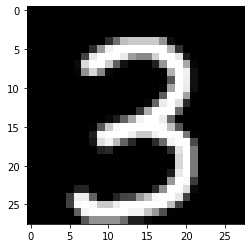

In [43]:
# image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')
# image file 읽기
cur_img = Image.open(img_path)
# 28X28로 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

try :
  image = np.mean(image, axis=2)
except :
  pass

# upload한 image는 흰 배경에 검은 글씨로 되어 있으므로 MNIST data와 같이 검은 배경에 흰 글씨로 변경 
image = np.abs(255-image)
# MNIST와 동일하게 data preprocessing(255로 나눔)
image = image.astype(np.float32)/255.
# 화면에 출력하여 확인
plt.imshow(image, cmap='gray')
plt.show()

In [44]:
image = torch.as_tensor(image).to(device).reshape(1, 1, 28, 28)
model.eval()
predict = model(image)
print('model이 예측한 값은 {} 입니다.'.format(predict.argmax(1).item()))

model이 예측한 값은 3 입니다.


# 4. Dataset/Dataloader

* data를 처리하여 model에 공급하는 방법으로 Pytorch에서는 dataset과 dataloader를 제공
* dataset은 data와 label을 저장하고, dataloader는 dataset을 model에 공급할 수 있도록 iterable 객체로 감싸줌

### **FasionMNIST data 불러오기**

In [45]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as tr

In [48]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor() # 텐서로 바꿔주면서 이미지를 0~1사이의 값으로 변경
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

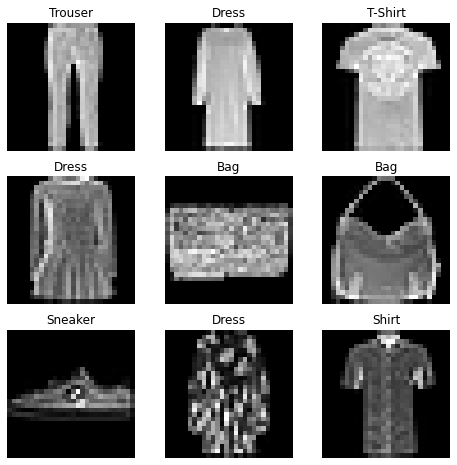

In [51]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1) :
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap='gray') # sueeze() : 채널을 없애줌, 1을 삭제, 28X28
plt.show()

### **DataLoader 만들기**

In [54]:
# DataLoader 만들기 -> 데이터를 공급해주는 것
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

Feature batch shape : torch.Size([64, 1, 28, 28])
Labels batch shape : torch.Size([64])


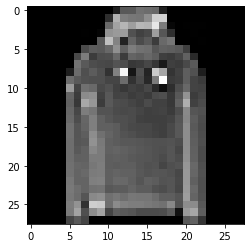

Label : 2


In [61]:
# DataLoader를 통해 반복하기(iterate)
# 이미지와 정답(label)을 표시함
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape : {train_features.size()}')
print(f'Labels batch shape : {train_labels.size()}')
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label : {label}')

### **Model**

In [62]:
# device 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


### **Model class 만들기**

In [63]:
# nn.Module : 부모 클래스, NeuralNetwork : 내가 만드는 자식 클래스
# super(NeuralNetwork, self) : 부모클래스의 생성자

class NeuralNetwork(nn.Module) :
  def __init__(self) :
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 128),#인풋
        nn.ReLU(),
        nn.Dropout(0.2), # Dropout은 과접합 되지 말라고 사용
        nn.Linear(128, 10) # 아웃풋
    )
    # Linear는 Dense층과 같음
    # 파이토치에서 softmax는 나중에 따로 적용
  def forward(self, x) :
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits
   # 파이토치에서 forward는 텐서플로의 call함수와 같다.

In [64]:
# Model instance 생성, device 설정
model = NeuralNetwork().to(device)
print(model) # print가 텐서플로의 model.summary랑 같은 역할

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [65]:
# 가상의 data를 만들어서 예측해보기
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f'Predicted class : {y_pred}')

Predicted class : tensor([4], device='cuda:0')


### **Training/Validation**

### **Loss Function**

In [66]:
# 손실 함수를 초기화
loss_fn = nn.CrossEntropyLoss()

### **Optimizer**

In [67]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### **Training/Validation(Test) Function**

In [75]:
# Training을 위한 함수
def train_loop(dataloader, model, loss_fn, optimizer) :
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader) :
    X, y = X.to(device), y.to(device)
    # 예측(prediction)과 손실(loss) 계산
    pred = model(X)
    loss = loss_fn(pred, y)

    # 역전파
    # gradient값들을 backward를 해줄 때 계속 값을 더해주기 때문에
    # loss.backward()를 호출 할 대 초기설정을 매번 더해주므로 
    # 한번의 학습이 끝나면 값을 0으로 초기화 해야 한다.
    optimizer.zero_grad()
    loss.backward() # 역전파가 일어남
    optimizer.step() # 이때 그레이디언트와 바이어스가 업데이트 된다.

    if batch % 100 == 0 :
      loss, current = loss.item(), batch * len(X)
      print(f'loss : {loss:>7f} [{current:>5d}/{size:>5d}]')

# Test를 위한 함수
def test_loop(dataloader, model, loss_fn) :
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  with torch.no_grad() : # 메모리 절약
    for X, y in dataloader :
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size

  print(f"Test Error : \n Accuracy : {(100*correct):>0.1f}%, Avg loss : {test_loss:>8f}\n")

In [77]:
# 학습 진행하기
epochs = 10
for t in range(epochs) :
  print(f'Epoch {t+1}\n---------------------------------')
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)

print('완료!')

Epoch 1
---------------------------------
loss : 0.332362 [    0/60000]
loss : 0.595227 [ 6400/60000]
loss : 0.544390 [12800/60000]
loss : 0.364973 [19200/60000]
loss : 0.290832 [25600/60000]
loss : 0.289807 [32000/60000]
loss : 0.350239 [38400/60000]
loss : 0.596107 [44800/60000]
loss : 0.390159 [51200/60000]
loss : 0.288376 [57600/60000]
Test Error : 
 Accuracy : 85.3%, Avg loss : 0.410742

Epoch 2
---------------------------------
loss : 0.451676 [    0/60000]
loss : 0.431682 [ 6400/60000]
loss : 0.261513 [12800/60000]
loss : 0.384525 [19200/60000]
loss : 0.457497 [25600/60000]
loss : 0.270581 [32000/60000]
loss : 0.538641 [38400/60000]
loss : 0.234055 [44800/60000]
loss : 0.458574 [51200/60000]
loss : 0.440653 [57600/60000]
Test Error : 
 Accuracy : 85.8%, Avg loss : 0.397731

Epoch 3
---------------------------------
loss : 0.289264 [    0/60000]
loss : 0.307176 [ 6400/60000]
loss : 0.375067 [12800/60000]
loss : 0.246481 [19200/60000]
loss : 0.342229 [25600/60000]
loss : 0.326388 

### **Model 저장하고 불러오기**

### **parameter만 저장하고 불러오기**

In [78]:
# 학습된 model parameter 저장
# torch.save(model.state_dict(), 모델명)
torch.save(model.state_dict(), 'model_weights.pth')

In [79]:
# 새 model instance를 생성, device 설정
model2 = NeuralNetwork().to(device)
print(model2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [80]:
# test
model.eval() # training을 하지 않음. 바로 결과 도출
test_loop(test_dataloader, model2, loss_fn)

Test Error : 
 Accuracy : 6.8%, Avg loss : 2.307083



In [81]:
# 저장한 prameter 불러오기
model2.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

In [82]:
# test
model.eval() # training을 하지 않음. 바로 결과 도출
test_loop(test_dataloader, model2, loss_fn)

Test Error : 
 Accuracy : 87.2%, Avg loss : 0.356969



### **model 전체를 저장하고 불러오기**

In [83]:
# 저장하기
# torch.save(model, 모델명)
torch.save(model, 'model.pth')

In [84]:
# 불러오기
model3 = torch.load('model.pth')

In [85]:
# test
model.eval() # training을 하지 않음. 바로 결과 도출
test_loop(test_dataloader, model3, loss_fn)

Test Error : 
 Accuracy : 88.2%, Avg loss : 0.330751

